In [1]:
import numpy as np
import pandas as pd
from docx import Document

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import sklearn.metrics as met
from sklearn.metrics import roc_auc_score

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('german.data', sep=' ', header=None)
columns = ['checking_acc_status', 'duration', 'cred_hist', 'purpose', 'loan_amt', 'saving_acc_bonds',
          'present_employment_since','installment_rate', 'personal_stat_gender', 'other_debtors_guarantors',
          'present_residence_since', 'property', 'age', 'other_installment_plans', 'housing', 'num_curr_loans',
          'job', 'num_people_provide_maint', 'telephone', 'is_foreign_worker', 'target']
df = pd.DataFrame(data.values, columns=columns)

In [4]:
mapping_dict = {
    'checking_acc_status': {'A11': 'below_0', 'A12': 'below_200', 'A13': 'above:200', 'A14': 'no_cheking_acc'},
    'cred_hist': {'A30': 'no_loan_or_paid_duly_other', 'A31': 'paid_duly_this_bank', 'A32': 'curr_loans_paid_duly',
                  'A33': 'delay_in_past', 'A34': 'risky_acc_or_curr_loan_other'},
    'purpose': {'A40': 'car_new', 'A41': 'car_used', 'A42': 'furniture_equipment', 'A43': 'radio_tv',
                'A44': 'domestic_applience', 'A45': 'repairs', 'A46': 'education', 'A47': 'vacation',
                'A48': 'retraining', 'A49': 'business', 'A410': 'others'},
    'saving_acc_bonds': {'A61': 'below_100', 'A62': 'below_500', 'A63': 'below_1000', 'A64': 'above_1000',
                         'A65': 'unknown_no_saving_acc'},
    'present_employment_since': {'A71': 'unemployed', 'A72': 'below_1y', 'A73': 'below_4y', 'A74': 'below_7y', 'A75': 'above_7y'},
    'personal_stat_gender': {'A91': 'male:divorced', 'A92': 'female:divorced_or_married', 'A93': 'male:single',
                      'A94': 'male:married_or_widowed', 'A95': 'female:single'},
    'other_debtors_guarantors': {'A101': 'none', 'A102': 'co_applicant', 'A103': 'guarantor'},
    'property': {'A121': 'real_estate', 'A122': 'life_insurance_or_aggreements', 'A123': 'car_or_other',
                 'A124': 'unknown_or_no_property'},
    'other_installment_plans': {'A141': 'bank', 'A142': 'store', 'A143': 'none'},
    'housing': {'A151': 'rent', 'A152': 'own', 'A153': 'for_free'},
    'job': {'A171': 'unemployed_non_resident', 'A172': 'unskilled_resident', 'A173': 'skilled_official',
            'A174': 'management_or_self_emp'},
    'telephone': {'A191': 'no', 'A192': 'yes'},
    'is_foreign_worker': {'A201': 'yes', 'A202': 'no'},
    'target':{1:'good',2:'bad'}
}
# 'telephone': {'A191': 'no', 'A192': 'yes'},
# 'is_foreign_worker': {'A201': 'yes', 'A202': 'no'},
# Apply mapping using replace to all columns at once
df.replace(mapping_dict, inplace=True)

In [5]:
df

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,male:single,none,4,real_estate,67,none,own,2,skilled_official,1,yes,yes,good
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,female:divorced_or_married,none,2,real_estate,22,none,own,1,skilled_official,1,no,yes,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,male:single,none,3,real_estate,49,none,own,1,unskilled_resident,2,no,yes,good
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,2,male:single,guarantor,4,life_insurance_or_aggreements,45,none,for_free,1,skilled_official,2,no,yes,good
4,below_0,24,delay_in_past,car_new,4870,below_100,below_4y,3,male:single,none,4,unknown_or_no_property,53,none,for_free,2,skilled_official,2,no,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_cheking_acc,12,curr_loans_paid_duly,furniture_equipment,1736,below_100,below_7y,3,female:divorced_or_married,none,4,real_estate,31,none,own,1,unskilled_resident,1,no,yes,good
996,below_0,30,curr_loans_paid_duly,car_used,3857,below_100,below_4y,4,male:divorced,none,4,life_insurance_or_aggreements,40,none,own,1,management_or_self_emp,1,yes,yes,good
997,no_cheking_acc,12,curr_loans_paid_duly,radio_tv,804,below_100,above_7y,4,male:single,none,4,car_or_other,38,none,own,1,skilled_official,1,no,yes,good
998,below_0,45,curr_loans_paid_duly,radio_tv,1845,below_100,below_4y,4,male:single,none,4,unknown_or_no_property,23,none,for_free,1,skilled_official,1,yes,yes,bad


In [6]:
df.isna().sum()

checking_acc_status         0
duration                    0
cred_hist                   0
purpose                     0
loan_amt                    0
saving_acc_bonds            0
present_employment_since    0
installment_rate            0
personal_stat_gender        0
other_debtors_guarantors    0
present_residence_since     0
property                    0
age                         0
other_installment_plans     0
housing                     0
num_curr_loans              0
job                         0
num_people_provide_maint    0
telephone                   0
is_foreign_worker           0
target                      0
dtype: int64

In [7]:
numeric_features = ['duration', 'loan_amt', 'installment_rate', 'present_residence_since', 'age', 'num_curr_loans', 
                    'num_people_provide_maint']
categorical_features = ['checking_acc_status', 'cred_hist', 'purpose', 'saving_acc_bonds', 'present_employment_since', 
                        'personal_stat_gender', 'other_debtors_guarantors', 'property', 'other_installment_plans', 
                        'housing', 'job', 'telephone', 'is_foreign_worker']

In [8]:
# Convert specified columns to numeric type
df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce', downcast='integer')

In [9]:
df.dtypes

checking_acc_status         object
duration                      int8
cred_hist                   object
purpose                     object
loan_amt                     int16
saving_acc_bonds            object
present_employment_since    object
installment_rate              int8
personal_stat_gender        object
other_debtors_guarantors    object
present_residence_since       int8
property                    object
age                           int8
other_installment_plans     object
housing                     object
num_curr_loans                int8
job                         object
num_people_provide_maint      int8
telephone                   object
is_foreign_worker           object
target                      object
dtype: object

In [10]:
df['target']=np.where(df['target'] == 'good', 0, 1)

In [11]:
df.head()

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,male:single,none,4,real_estate,67,none,own,2,skilled_official,1,yes,yes,0
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,female:divorced_or_married,none,2,real_estate,22,none,own,1,skilled_official,1,no,yes,1
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,male:single,none,3,real_estate,49,none,own,1,unskilled_resident,2,no,yes,0
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,2,male:single,guarantor,4,life_insurance_or_aggreements,45,none,for_free,1,skilled_official,2,no,yes,0
4,below_0,24,delay_in_past,car_new,4870,below_100,below_4y,3,male:single,none,4,unknown_or_no_property,53,none,for_free,2,skilled_official,2,no,yes,1


In [12]:
import optuna
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectFromModel #select a subset of important features 

In [13]:
for col in numeric_features:
    distinct_value_count = df[col].nunique()
    print(f"{col}: {distinct_value_count}")

duration: 33
loan_amt: 921
installment_rate: 4
present_residence_since: 4
age: 53
num_curr_loans: 4
num_people_provide_maint: 2


In [14]:
X = df[numeric_features+categorical_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

# Baseline model

In [15]:
# Separate transformers for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Apply transformers to specific features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the test data using the preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Build and train the model
model = LogisticRegression(class_weight='balanced', random_state=13)
model.fit(X_train_preprocessed, y_train)

# Predict on the test data
y_pred_proba = model.predict_proba(X_test_preprocessed)[:, 1]

# Evaluate the model
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC on test data: {auc_roc}")

AUC-ROC on test data: 0.8217857142857142


# HyperParameter tuning with Optuna

In [16]:
def objective(trial):
    
    """ 'objective'that takes hyperparameters as input and returns a score to be minimized """
    
    params = {
        'class_weight':'balanced',
        'C': trial.suggest_float("C", 0.001, 100),
        'l1_ratio': trial.suggest_float("l1_ratio", 0, 1),
        'penalty':'elasticnet',
        'solver': 'saga',
        'random_state': 13
    }
    
    min_frequency = trial.suggest_float("min_frequency", 1e-5, 0.05)
    
    numeric_transformer_options = {
        'StandardScaler': StandardScaler(),
        'RobustScaler': RobustScaler(),
    }

#     selected_scaler = trial.suggest_categorical("scaler", list(numeric_transformer_options.keys()))
    selected_scaler = trial.suggest_categorical("scaler", ['StandardScaler', 'RobustScaler'])
        
    
    model = LogisticRegression(**params)
    
    cat_p = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='not_given')), 
                    ('encoder', OneHotEncoder(min_frequency=min_frequency, sparse_output=False, handle_unknown='ignore'))])
    
    numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=0)),
                                          ('scaler', numeric_transformer_options[selected_scaler])])
    
    # Feature Selector
    selector = SelectFromModel(model, max_features=20)
    
    # Full Transformer
    transformer = ColumnTransformer(
        transformers=[
            ('cat_p', cat_p, categorical_features),
            ('num_p', numeric_transformer, numeric_features)
        ],
        remainder='drop'
    )

    

    transformer = ColumnTransformer(transformers=[
        ('cat_p', cat_p, categorical_features), 
        ('num_p', numeric_transformer, numeric_features)
    ], 
    remainder='drop').set_output(transform='pandas')


#     pipeline = Pipeline(steps=[('transformer', transformer), 
#                          ('selector', SelectFromModel(model, max_features=20)), 
#                          ('model', model)
#                         ]).set_output(transform='pandas')
    
    # Full Pipeline
    pipeline = Pipeline(steps=[
        ('transformer', transformer),
        ('selector', selector),
        ('model', model)
    ]).set_output(transform='pandas')
    

#     r2s, adj_r2s, mapes, train_r2s, train_adj_r2s, train_mapes = cross_val(pipeline, df)
    means = cross_val_score(estimator=pipeline,X=X_train,y=y_train, cv=5, scoring='roc_auc')
    print("Train cv means", means)
    
    
#     print(f"Train: MAE {np.mean(train_mapes)}, R2 {np.mean(train_r2s)}, Adjusted R2 {np.mean(train_adj_r2s)}")
#     print(f"MAE {np.mean(mapes)}, R2 {np.mean(r2s)}, Adjusted R2 {np.mean(adj_r2s)}")
    
    return np.mean(means)

In [17]:
def tune(objective):
    study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(
                            seed=1))
    study.optimize(objective, n_trials=100, show_progress_bar=True)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score} \nOptimized parameters: {params}")
    return study

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
study = tune(objective)

[I 2024-01-14 19:22:21,790] A new study created in memory with name: no-name-2e783eb9-1012-4a6f-a96a-64e7a6a5d6d9


  0%|          | 0/100 [00:00<?, ?it/s]

Train cv means [0.75762649 0.70070685 0.71698289 0.72395833 0.75334821]
[I 2024-01-14 19:22:22,432] Trial 0 finished with value: 0.7305245535714286 and parameters: {'C': 41.702783448252696, 'l1_ratio': 0.7203244934421581, 'min_frequency': 1.5717597119070883e-05, 'scaler': 'StandardScaler'}. Best is trial 0 with value: 0.7305245535714286.
Train cv means [0.78459821 0.70545015 0.7265625  0.72665551 0.75762649]
[I 2024-01-14 19:22:23,083] Trial 1 finished with value: 0.7401785714285715 and parameters: {'C': 9.23476713828501, 'l1_ratio': 0.1862602113776709, 'min_frequency': 0.017284580744881956, 'scaler': 'RobustScaler'}. Best is trial 1 with value: 0.7401785714285715.
Train cv means [0.75762649 0.70089286 0.71698289 0.72395833 0.75334821]
[I 2024-01-14 19:22:23,744] Trial 2 finished with value: 0.730561755952381 and parameters: {'C': 41.92003224581507, 'l1_ratio': 0.6852195003967595, 'min_frequency': 0.010230567964078556, 'scaler': 'StandardScaler'}. Best is trial 1 with value: 0.74017857

Train cv means [0.77250744 0.69438244 0.71763393 0.76674107 0.75985863]
[I 2024-01-14 19:22:39,509] Trial 25 finished with value: 0.7422247023809523 and parameters: {'C': 25.563245574342154, 'l1_ratio': 0.5935700512675898, 'min_frequency': 0.04386783480516697, 'scaler': 'StandardScaler'}. Best is trial 22 with value: 0.7700892857142857.
Train cv means [0.77232143 0.70210193 0.73372396 0.76655506 0.76023065]
[I 2024-01-14 19:22:40,402] Trial 26 finished with value: 0.7469866071428571 and parameters: {'C': 13.753319142257727, 'l1_ratio': 0.4406798534309052, 'min_frequency': 0.03646465138523529, 'scaler': 'StandardScaler'}. Best is trial 22 with value: 0.7700892857142857.
Train cv means [0.77250744 0.69438244 0.71763393 0.76655506 0.75334821]
[I 2024-01-14 19:22:41,164] Trial 27 finished with value: 0.7408854166666666 and parameters: {'C': 33.99224758361642, 'l1_ratio': 0.8265273245109453, 'min_frequency': 0.045402410848305624, 'scaler': 'StandardScaler'}. Best is trial 22 with value: 0.7

Train cv means [0.77120536 0.74032738 0.7609747  0.77845982 0.78404018]
[I 2024-01-14 19:22:56,535] Trial 50 finished with value: 0.7670014880952382 and parameters: {'C': 0.2628282277298585, 'l1_ratio': 0.7174817009849798, 'min_frequency': 0.03647187779406303, 'scaler': 'StandardScaler'}. Best is trial 22 with value: 0.7700892857142857.
Train cv means [0.77250744 0.74162946 0.75818452 0.79761905 0.77901786]
[I 2024-01-14 19:22:57,172] Trial 51 finished with value: 0.7697916666666667 and parameters: {'C': 0.21485907287100048, 'l1_ratio': 0.7295499959003173, 'min_frequency': 0.02845741218948899, 'scaler': 'StandardScaler'}. Best is trial 22 with value: 0.7700892857142857.
Train cv means [0.78831845 0.7202381  0.78850446 0.77139137 0.75799851]
[I 2024-01-14 19:22:57,850] Trial 52 finished with value: 0.7652901785714286 and parameters: {'C': 1.1065153399930518, 'l1_ratio': 0.7252868979557268, 'min_frequency': 0.025619095131090834, 'scaler': 'StandardScaler'}. Best is trial 22 with value: 0

Train cv means [0.78683036 0.69968378 0.70814732 0.72247024 0.75279018]
[I 2024-01-14 19:23:13,101] Trial 75 finished with value: 0.733984375 and parameters: {'C': 4.9801500671088155, 'l1_ratio': 0.7231078182898437, 'min_frequency': 0.03243831866941653, 'scaler': 'RobustScaler'}. Best is trial 22 with value: 0.7700892857142857.
Train cv means [0.77845982 0.70210193 0.72832961 0.73781622 0.76060268]
[I 2024-01-14 19:23:13,789] Trial 76 finished with value: 0.7414620535714287 and parameters: {'C': 12.004331344306484, 'l1_ratio': 0.8537161276595103, 'min_frequency': 0.03481279868157156, 'scaler': 'StandardScaler'}. Best is trial 22 with value: 0.7700892857142857.
Train cv means [0.77362351 0.69540551 0.72795759 0.73800223 0.76023065]
[I 2024-01-14 19:23:14,510] Trial 77 finished with value: 0.7390438988095238 and parameters: {'C': 8.538502962304836, 'l1_ratio': 0.7974437170145829, 'min_frequency': 0.03858454753758228, 'scaler': 'StandardScaler'}. Best is trial 22 with value: 0.77008928571

In [20]:
study.best_params

{'C': 0.3967712181962182,
 'l1_ratio': 0.5737594956353204,
 'min_frequency': 0.04401477363575643,
 'scaler': 'StandardScaler'}

In [21]:
study.best_value

0.7700892857142857

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Optimized parameters
params = {
    'class_weight': 'balanced',
    'C': 0.3967712181962182,
   'l1_ratio': 0.5737594956353204,
    'penalty': 'elasticnet',
    'solver': 'saga',
    'random_state': 13
}

# Logistic Regression model with optimized parameters
model = LogisticRegression(**params)

# Preprocessing for categorical features
cat_p = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_given')),
    ('encoder', OneHotEncoder(min_frequency=0.04401477363575643, sparse_output=False, handle_unknown='ignore'))
])

# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', RobustScaler())
])

# Combine transformers
transformer = ColumnTransformer(transformers=[
    ('cat_p', cat_p, categorical_features),
    ('num_p', numeric_transformer, numeric_features)
], remainder='drop')

# Full pipeline
pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('selector', SelectFromModel(model, max_features=20)),
    ('model', model)
])

# Split the data (assuming X, y are defined)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# You can then use the pipeline for predictions or further evaluation

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat_p',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='not_given',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 min_frequency=0.04401477363575643,
                                                                                 sparse_output=False))]),
                                                  ['checking_acc_status',
                                                   'cred_hist', 'purpose',
                                                   'saving_acc_bonds',
                                                   'present_employment_s...
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(C=0.3967712181962182,
                                                              class_weight='balanced',
                                                              l1_ratio=0.5737594956353204,
                                                              penalty='elasticnet',
                                                              random_state=13,
                                                              solver='saga'),
                                 max_features=20)),
                ('model',
                 LogisticRegression(C=0.3967712181962182,
                                    class_weight='balanced',
                                    l1_ratio=0.5737594956353204,
                                    penalty='elasticnet', random_state=13,
                                    solver='saga'))])

In [27]:
X_test

,duration,loan_amt,installment_rate,present_residence_since,age,num_curr_loans,num_people_provide_maint,checking_acc_status,cred_hist,purpose,saving_acc_bonds,present_employment_since,personal_stat_gender,other_debtors_guarantors,property,other_installment_plans,housing,job,telephone,is_foreign_worker
978,24,2538,4,4,47,2,2,no_cheking_acc,delay_in_past,car_new,below_100,above_7y,male:single,none,car_or_other,none,own,unskilled_resident,no,yes
820,12,1101,3,2,27,2,1,no_cheking_acc,curr_loans_paid_duly,car_new,below_100,below_4y,male:married_or_widowed,none,real_estate,none,own,skilled_official,yes,yes
183,24,3777,4,4,50,1,1,no_cheking_acc,risky_acc_or_curr_loan_other,furniture_equipment,above_1000,below_4y,male:single,none,real_estate,none,own,skilled_official,yes,yes
709,9,2118,2,2,37,1,2,below_200,curr_loans_paid_duly,radio_tv,below_100,below_4y,male:single,none,real_estate,none,own,unskilled_resident,no,yes
379,6,362,4,4,52,2,1,no_cheking_acc,risky_acc_or_curr_loan_other,car_new,below_500,below_4y,female:divorced_or_married,none,car_or_other,none,own,unskilled_resident,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,14,802,4,2,27,2,1,no_cheking_acc,delay_in_past,car_new,below_100,below_4y,male:single,none,car_or_other,none,own,unskilled_resident,no,yes
916,10,2848,1,2,32,1,2,no_cheking_acc,curr_loans_paid_duly,car_used,below_500,below_4y,male:single,co_applicant,real_estate,none,own,skilled_official,no,yes
840,36,5179,4,2,29,1,1,below_0,curr_loans_paid_duly,furniture_equipment,below_100,below_7y,male:single,none,life_insurance_or_aggreements,none,own,skilled_official,no,yes
788,48,6224,4,4,50,1,1,below_200,delay_in_past,education,below_100,above_7y,male:single,none,unknown_or_no_property,none,for_free,skilled_official,no,yes


In [28]:
pred_proba = pipeline.predict_proba(X=X_test)[:,1]
pred_proba

array([0.36581001, 0.4032482 , 0.12105238, 0.41088476, 0.20294975,
       0.67553477, 0.61575997, 0.73914924, 0.3090831 , 0.28144334,
       0.62306479, 0.17231702, 0.32406052, 0.51248762, 0.50026701,
       0.60305798, 0.19192455, 0.54569031, 0.43784768, 0.37262606,
       0.14997027, 0.77095357, 0.08092511, 0.81337594, 0.68115317,
       0.68098417, 0.31694758, 0.77885503, 0.62055649, 0.71579802,
       0.63578475, 0.10636925, 0.61817103, 0.43944201, 0.0670215 ,
       0.25843148, 0.74423554, 0.28784885, 0.44873535, 0.70316704,
       0.56971923, 0.06442827, 0.77574968, 0.38288947, 0.12819311,
       0.45333809, 0.13200397, 0.5902565 , 0.50116009, 0.18138706,
       0.59671588, 0.70011809, 0.41850292, 0.82352141, 0.29499971,
       0.54391489, 0.2248912 , 0.08708377, 0.29588639, 0.07640224,
       0.23237125, 0.81953764, 0.43511017, 0.74925099, 0.09052714,
       0.40729262, 0.81645194, 0.35411805, 0.2994614 , 0.26359472,
       0.21245615, 0.28089222, 0.0977893 , 0.50690914, 0.88354

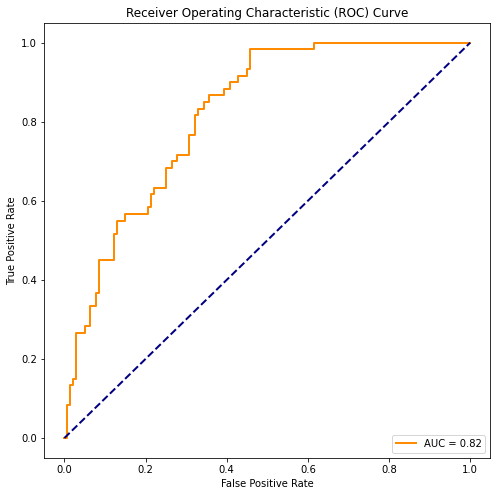

In [29]:
import matplotlib.pyplot as plt

# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_classification
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import plot_roc_curve

# Compute ROC curve and AUC
fpr, tpr, thresholds = met.roc_curve(y_test, pred_proba)
roc_auc = met.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()